In [1]:
import pandas as pd
import numpy as np

# GWAS AD data preprocessing (from VCF files)

## Obtaining dictionary of AD GWAS associated genes and the variant names

In [2]:
import os
import pandas as pd
import pickle

# Directory containing the files
directory = './gwas_genes_dict/'

# Initialize an empty dictionary to store the gene to variants mapping
gene_variants_dict = {}

# Iterate through all files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.txt'):
        filepath = os.path.join(directory, filename)
        # Read the file into a DataFrame
        df = pd.read_csv(filepath, sep='\t')
        
        # Iterate through each row in the DataFrame
        for index, row in df.iterrows():
            gene_id = row['Gene stable ID']
            variant_name = row['Variant name']
            
            # Add the variant to the list of variants for the gene in the dictionary
            if gene_id not in gene_variants_dict:
                gene_variants_dict[gene_id] = []
            gene_variants_dict[gene_id].append(variant_name)

# Save the dictionary to a pickle file
output_pickle_file = 'gene_variants_dict_AD.pkl'
# with open(output_pickle_file, 'wb') as f:
#     pickle.dump(gene_variants_dict, f)

print(f"Dictionary saved to {output_pickle_file}")


Dictionary saved to gene_variants_dict_AD.pkl


In [ ]:
gene_variants_dict

In [1]:
with open(output_pickle_file, 'wb') as f:
    pickle.dump(gene_variants_dict, f)

NameError: name 'output_pickle_file' is not defined

In [10]:
# Calculate the number of keys in the dictionary
num_keys = len(gene_variants_dict)
print(f"Number of keys (gene IDs) in the dictionary: {num_keys}")

# Calculate the mean number of values (variants) per key in the dictionary
if num_keys > 0:
    mean_values = sum(len(variants) for variants in gene_variants_dict.values()) / num_keys
    print(f"Average number of variants per gene: {mean_values:.2f}")
else:
    print("The dictionary is empty.")

Number of keys (gene IDs) in the dictionary: 113
Average number of variants per gene: 46106.13


In [ ]:
# Filtering the dict to reduce number of snps

In [11]:
# How many snps are the same as phenotype associated

import pickle

# Load the SNP list from the text file
snp_list_path = './all_snps_list_phenotype_associated.txt'
with open(snp_list_path, 'r') as file:
    snp_set = set(file.read().splitlines())

# Count how many SNPs in the dictionary are in the SNP list
matching_snps_count = 0
total_snps_count = 0

for variants in gene_variants_dict.values():
    for snp in variants:
        total_snps_count += 1
        if snp in snp_set:
            matching_snps_count += 1

print(f"Total SNPs in dictionary: {total_snps_count}")
print(f"Matching SNPs: {matching_snps_count}")
print(f"Percentage of Matching SNPs: {(matching_snps_count / total_snps_count * 100):.2f}%")


Total SNPs in dictionary: 5209993
Matching SNPs: 24346
Percentage of Matching SNPs: 0.47%


In [12]:
import pickle

# Load the SNP list from the text file
snp_list_path = './all_snps_list_phenotype_associated.txt'
with open(snp_list_path, 'r') as file:
    snp_set = set(file.read().splitlines())

# Filter the dictionary to only include SNPs that are in the snp_set
filtered_dict = {}
for gene, variants in gene_variants_dict.items():
    filtered_snps = [snp for snp in variants if snp in snp_set]
    if filtered_snps:  # Only add gene if there are any matching SNPs
        filtered_dict[gene] = filtered_snps

# Save the filtered dictionary to a new pickle file
filtered_pickle_file = 'gene_variants_dict_AD_filt_phenotype.pkl'
with open(filtered_pickle_file, 'wb') as f:
    pickle.dump(filtered_dict, f)

print(f"Filtered dictionary saved to {filtered_pickle_file}")


Filtered dictionary saved to gene_variants_dict_AD_filt_phenotype.pkl


In [13]:
# Calculate the number of keys in the dictionary
num_keys = len(filtered_dict)
print(f"Number of keys (gene IDs) in the dictionary: {num_keys}")

# Calculate the mean number of values (variants) per key in the dictionary
if num_keys > 0:
    mean_values = sum(len(variants) for variants in filtered_dict.values()) / num_keys
    print(f"Average number of variants per gene: {mean_values:.2f}")
else:
    print("The dictionary is empty.")

Number of keys (gene IDs) in the dictionary: 113
Average number of variants per gene: 215.45


## Filtering chr tsv files

In [ ]:
# TSV files were generated straight from the chr_dosage_gz files
# Script checks which rows in the tsv files are SNPs from the SNP dictionary
# At last, it creates a matrix which rows are rosmap individuals and cols are snps

In [5]:
# Load the gene-variant dictionary from the pickle file
import pickle

dict_path = 'gene_variants_dict_AD.pkl'
with open(dict_path, 'rb') as f:
    gene_variants_dict = pickle.load(f)

# Collect all SNP IDs from the dictionary into a set for fast lookup
snp_set = set()
for snps in gene_variants_dict.values():
    snp_set.update(snps)

In [6]:
len(snp_set)

5137266

In [3]:
df = pd.read_csv('./dosage_imputed_vcf_files/AMP-AD_ROSMAP_Rush-Broad_AffymetrixGenechip6_Imputed_chr22.tsv', sep=' ', header=None)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1702,1703,1704,1705,1706,1707,1708,1709,1710,1711
0,rs62224609,T,C,1.90811,1.90858,1.90811,1.90904,1.90811,1.90811,1.90904,...,1.90941,1.90941,1.90958,1.90941,1.90959,1.90941,1.90958,1.90959,1.90958,NaN
1,rs11089130,G,C,1.65161,1.65336,1.65161,1.65512,1.65161,1.65161,1.65511,...,1.66232,1.66232,1.66300,1.66232,1.66299,1.66232,1.66300,1.66299,1.66300,NaN
2,rs11089134,A,G,1.64777,1.64953,1.64777,1.65132,1.64777,1.64777,1.65131,...,1.65757,1.65757,1.65825,1.65757,1.65823,1.65757,1.65826,1.65823,1.65825,NaN
3,rs2843213,C,T,1.94153,1.94165,1.94153,1.94179,1.94153,1.94153,1.94179,...,1.94326,1.94326,1.94330,1.94326,1.94330,1.94326,1.94330,1.94330,1.94330,NaN
4,rs2096600,A,C,1.31489,1.31839,1.31489,1.32192,1.31489,1.31489,1.32191,...,1.32288,1.32288,1.32421,1.32288,1.32419,1.32288,1.32422,1.32419,1.32421,NaN


In [ ]:
import os
import pandas as pd
import pickle

# Load the gene-variant dictionary from the pickle file
dict_path = 'gene_variants_dict_AD_filt_phenotype.pkl'
with open(dict_path, 'rb') as f:
    gene_variants_dict = pickle.load(f)

# Collect all SNP IDs from the dictionary into a set for fast lookup
snp_set = set()
for snps in gene_variants_dict.values():
    snp_set.update(snps)

# Directory containing the TSV files
directory = './'

# Loop through all TSV files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.tsv'):
        filepath = os.path.join(directory, filename)
        df = pd.read_csv(filepath, sep=' ', header=None)

        # Filter the dataframe to keep only rows where the first column is in snp_set
        filtered_df = df[df[0].isin(snp_set)]

        # Count the rows in the filtered DataFrame
        row_count = filtered_df.shape[0]

        # Create new filename based on the last part of the original filename
        new_filename = filename.split('_')[-1]
        new_filepath = os.path.join(directory, new_filename)

        # Save the filtered dataframe to a new TSV file
        filtered_df.to_csv(new_filepath, sep='\t', index=False, header=False)

        # Print information about the processing and row count
        print(f"Processed {filename}: {row_count} rows saved to {new_filename}")

print("All files have been processed.")


In [ ]:
# UNIX command to merge the tsv files into one tsv file (row-wise)
cat /path/to/directory/*.tsv > merged_file.tsv

In [ ]:
# Add header as the list of individuals to the tsv file
# Filter and keep only ROSMAP individuals
# Transpose the dataframe

In [ ]:
# Step by step

In [11]:
import pandas as pd

# Load the TSV file without headers
tsv_file_path = '/home/vmottaqi/rnaseq_synapse/ad_shap_gwas/dosage_imputed_vcf_files/chr_concatinated.tsv'
df = pd.read_csv(tsv_file_path, sep='\s+', header=None, engine='python')

# Load the individual identifiers
individuals_file_path = '/home/vmottaqi/rnaseq_synapse/ad_shap_gwas/dosage_imputed_vcf_files/individuals.csv'
with open(individuals_file_path, 'r') as file:
    # Assuming each line contains one individual identifier
    headers = [line.strip() for line in file.readlines()]




In [12]:
df

,0,1,2,3,4,5,6,7,8,9,...,1701,1702,1703,1704,1705,1706,1707,1708,1709,1710
0,rs72777665,T,A,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,...,1.28960,1.28864,2.00000,1.28953,2.00000,2.00000,2.00000,2.00000,1.28922,2.00000
1,rs35345466,A,T,0.93633,0.26569,0.03411,0.93413,0.95241,0.96472,0.94774,...,0.93148,0.00000,0.92957,0.00000,0.14522,1.84339,0.91914,1.15320,0.16229,0.16842
2,rs11257183,T,C,1.00000,2.00000,2.00000,1.00000,2.00000,2.00000,2.00000,...,2.00000,2.00000,1.00000,1.00000,2.00000,2.00000,1.00000,2.00000,2.00000,1.00000
3,rs16914105,C,T,1.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,...,2.00000,2.00000,2.00000,2.00000,2.00000,1.00000,2.00000,1.00000,2.00000,2.00000
4,rs7917618,G,A,2.00000,1.99896,1.99931,1.99999,1.99999,1.99907,2.00000,...,1.99911,1.99965,2.00000,2.00000,2.00000,1.99992,1.99649,2.00000,1.99894,1.99820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,rs36137267,T,C,1.02021,1.01901,0.98175,1.01908,1.99010,0.97431,1.97976,...,1.94194,0.03687,0.07033,0.09149,1.05846,1.01997,1.06632,1.85975,1.02561,1.97771
2961,rs6606291,C,T,1.89330,1.88121,1.88121,1.88121,1.88121,1.89330,1.88121,...,1.88489,1.89351,1.88489,1.89351,1.88489,1.88489,1.88484,1.89351,1.89351,1.88489
2962,rs12337435,C,A,1.00350,1.00536,1.99921,0.02163,1.99959,0.02076,1.00962,...,1.01501,1.99907,1.01535,1.99949,1.01626,1.00376,1.99873,1.00267,1.01543,2.00000
2963,rs12343184,T,C,1.00089,1.00113,1.99937,0.01343,1.99959,0.01337,1.00651,...,1.01438,1.99923,1.01441,1.99969,1.01460,1.00085,1.99906,1.00123,1.01452,2.00000


In [13]:
# Assign the headers to the dataframe
df.columns = ['SNP_ID', "REF", "ALT"] + headers  # Prepend 'SNP_ID' for the first column


In [15]:
df

,SNP_ID,REF,ALT,ROS10442701,ROS11444465,ROS21112011,ROS20297791,ROS11395417,ROS21174303,ROS10669174,...,MAP50406183,MAP50401426,ROS10263208,MAP50109053,MAP50104396,MAP33006377,MAP50402693,ROS11349821,ROS11099004,MAP29821047
0,rs72777665,T,A,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,...,1.28960,1.28864,2.00000,1.28953,2.00000,2.00000,2.00000,2.00000,1.28922,2.00000
1,rs35345466,A,T,0.93633,0.26569,0.03411,0.93413,0.95241,0.96472,0.94774,...,0.93148,0.00000,0.92957,0.00000,0.14522,1.84339,0.91914,1.15320,0.16229,0.16842
2,rs11257183,T,C,1.00000,2.00000,2.00000,1.00000,2.00000,2.00000,2.00000,...,2.00000,2.00000,1.00000,1.00000,2.00000,2.00000,1.00000,2.00000,2.00000,1.00000
3,rs16914105,C,T,1.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,...,2.00000,2.00000,2.00000,2.00000,2.00000,1.00000,2.00000,1.00000,2.00000,2.00000
4,rs7917618,G,A,2.00000,1.99896,1.99931,1.99999,1.99999,1.99907,2.00000,...,1.99911,1.99965,2.00000,2.00000,2.00000,1.99992,1.99649,2.00000,1.99894,1.99820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,rs36137267,T,C,1.02021,1.01901,0.98175,1.01908,1.99010,0.97431,1.97976,...,1.94194,0.03687,0.07033,0.09149,1.05846,1.01997,1.06632,1.85975,1.02561,1.97771
2961,rs6606291,C,T,1.89330,1.88121,1.88121,1.88121,1.88121,1.89330,1.88121,...,1.88489,1.89351,1.88489,1.89351,1.88489,1.88489,1.88484,1.89351,1.89351,1.88489
2962,rs12337435,C,A,1.00350,1.00536,1.99921,0.02163,1.99959,0.02076,1.00962,...,1.01501,1.99907,1.01535,1.99949,1.01626,1.00376,1.99873,1.00267,1.01543,2.00000
2963,rs12343184,T,C,1.00089,1.00113,1.99937,0.01343,1.99959,0.01337,1.00651,...,1.01438,1.99923,1.01441,1.99969,1.01460,1.00085,1.99906,1.00123,1.01452,2.00000


In [16]:
# Function to remove the prefix "ROS" or "MAP" from column names
def remove_prefix(col_name):
    if col_name.startswith("ROS"):
        return col_name[3:]  # Remove the first 3 characters
    elif col_name.startswith("MAP"):
        return col_name[3:]  # Remove the first 3 characters
    else:
        return col_name

# Apply the function to each column name
df.columns = [remove_prefix(col) for col in df.columns]


In [24]:
df

,SNP_ID,REF,ALT,10442701,11444465,21112011,20297791,11395417,21174303,10669174,...,50406183,50401426,10263208,50109053,50104396,33006377,50402693,11349821,11099004,29821047
0,rs72777665,T,A,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,...,1.28960,1.28864,2.00000,1.28953,2.00000,2.00000,2.00000,2.00000,1.28922,2.00000
1,rs35345466,A,T,0.93633,0.26569,0.03411,0.93413,0.95241,0.96472,0.94774,...,0.93148,0.00000,0.92957,0.00000,0.14522,1.84339,0.91914,1.15320,0.16229,0.16842
2,rs11257183,T,C,1.00000,2.00000,2.00000,1.00000,2.00000,2.00000,2.00000,...,2.00000,2.00000,1.00000,1.00000,2.00000,2.00000,1.00000,2.00000,2.00000,1.00000
3,rs16914105,C,T,1.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,...,2.00000,2.00000,2.00000,2.00000,2.00000,1.00000,2.00000,1.00000,2.00000,2.00000
4,rs7917618,G,A,2.00000,1.99896,1.99931,1.99999,1.99999,1.99907,2.00000,...,1.99911,1.99965,2.00000,2.00000,2.00000,1.99992,1.99649,2.00000,1.99894,1.99820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,rs36137267,T,C,1.02021,1.01901,0.98175,1.01908,1.99010,0.97431,1.97976,...,1.94194,0.03687,0.07033,0.09149,1.05846,1.01997,1.06632,1.85975,1.02561,1.97771
2961,rs6606291,C,T,1.89330,1.88121,1.88121,1.88121,1.88121,1.89330,1.88121,...,1.88489,1.89351,1.88489,1.89351,1.88489,1.88489,1.88484,1.89351,1.89351,1.88489
2962,rs12337435,C,A,1.00350,1.00536,1.99921,0.02163,1.99959,0.02076,1.00962,...,1.01501,1.99907,1.01535,1.99949,1.01626,1.00376,1.99873,1.00267,1.01543,2.00000
2963,rs12343184,T,C,1.00089,1.00113,1.99937,0.01343,1.99959,0.01337,1.00651,...,1.01438,1.99923,1.01441,1.99969,1.01460,1.00085,1.99906,1.00123,1.01452,2.00000


In [ ]:
# Clinical data for mapping

In [18]:
ros_clinical = pd.read_csv("/home/vmottaqi/rnaseq_synapse/ad_shap_gwas/dosage_imputed_vcf_files/ROSMAP_clinical.csv")
ros_clinical

,projid,Study,msex,educ,race,spanish,apoe_genotype,age_at_visit_max,age_first_ad_dx,age_death,cts_mmse30_first_ad_dx,cts_mmse30_lv,pmi,braaksc,ceradsc,cogdx,dcfdx_lv,individualID
0,10101589,ROS,1.0,20.0,1.0,2.0,34.0,90+,90+,90+,18.0,5.0,9.916667,4.0,2.0,4.0,4.0,R6939144
1,86767530,MAP,0.0,10.0,1.0,2.0,33.0,90+,90+,90+,18.0,10.0,6.500000,4.0,2.0,4.0,4.0,R3893503
2,9650662,MAP,0.0,15.0,1.0,2.0,23.0,90+,90+,90+,0.0,0.0,3.850000,3.0,2.0,4.0,4.0,R8937093
3,50402855,MAP,0.0,21.0,1.0,2.0,33.0,90+,NaN,NaN,NaN,27.0,NaN,NaN,NaN,NaN,1.0,R7139444
4,20544321,ROS,0.0,16.0,1.0,2.0,23.0,90+,90+,NaN,13.0,14.0,NaN,NaN,NaN,NaN,4.0,R4971237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3579,22207815,ROS,0.0,18.0,2.0,2.0,23.0,57.653661875427787,NaN,NaN,NaN,29.0,NaN,NaN,NaN,NaN,1.0,R5306025
3580,22207941,ROS,0.0,16.0,2.0,2.0,34.0,56.651608487337441,NaN,NaN,NaN,27.0,NaN,NaN,NaN,NaN,1.0,R6142763
3581,49333806,MAP,0.0,12.0,2.0,2.0,NaN,56.599589322381931,NaN,NaN,NaN,30.0,NaN,NaN,NaN,NaN,1.0,R4468842
3582,59720188,MAP,0.0,13.0,1.0,1.0,NaN,54.622861054072551,NaN,NaN,NaN,29.0,NaN,NaN,NaN,NaN,1.0,R9446033


In [27]:
# Create a mapping dictionary from projid to individualID
mapping_dict = pd.Series(ros_clinical['individualID'].values, index=ros_clinical['projid']).to_dict()

# Ensure all keys and values in the mapping dictionary are strings
mapping_dict = {str(key): str(value) for key, value in mapping_dict.items()}

# Ensure all column names in df1 are strings
df.columns = df.columns.astype(str)

# Rename the columns of the first DataFrame using the mapping dictionary
df.rename(columns=mapping_dict, inplace=True)

In [30]:
# Remove the REF and ALT columns
df.drop(columns=['REF', 'ALT'], inplace=True)

In [31]:
df

,SNP_ID,R3627269,R6655598,R7540069,R5789564,R7047807,R8375980,R4641987,R1801421,R3322663,...,R6835201,R5313591,R5647192,R7914294,R3450006,R3649358,R8075334,R4847810,R4131479,R8093392
0,rs72777665,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,...,1.28960,1.28864,2.00000,1.28953,2.00000,2.00000,2.00000,2.00000,1.28922,2.00000
1,rs35345466,0.93633,0.26569,0.03411,0.93413,0.95241,0.96472,0.94774,0.00008,0.08625,...,0.93148,0.00000,0.92957,0.00000,0.14522,1.84339,0.91914,1.15320,0.16229,0.16842
2,rs11257183,1.00000,2.00000,2.00000,1.00000,2.00000,2.00000,2.00000,1.00000,1.00000,...,2.00000,2.00000,1.00000,1.00000,2.00000,2.00000,1.00000,2.00000,2.00000,1.00000
3,rs16914105,1.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,...,2.00000,2.00000,2.00000,2.00000,2.00000,1.00000,2.00000,1.00000,2.00000,2.00000
4,rs7917618,2.00000,1.99896,1.99931,1.99999,1.99999,1.99907,2.00000,1.99859,1.99950,...,1.99911,1.99965,2.00000,2.00000,2.00000,1.99992,1.99649,2.00000,1.99894,1.99820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,rs36137267,1.02021,1.01901,0.98175,1.01908,1.99010,0.97431,1.97976,1.03732,2.00000,...,1.94194,0.03687,0.07033,0.09149,1.05846,1.01997,1.06632,1.85975,1.02561,1.97771
2961,rs6606291,1.89330,1.88121,1.88121,1.88121,1.88121,1.89330,1.88121,1.88121,1.89318,...,1.88489,1.89351,1.88489,1.89351,1.88489,1.88489,1.88484,1.89351,1.89351,1.88489
2962,rs12337435,1.00350,1.00536,1.99921,0.02163,1.99959,0.02076,1.00962,1.99981,1.01454,...,1.01501,1.99907,1.01535,1.99949,1.01626,1.00376,1.99873,1.00267,1.01543,2.00000
2963,rs12343184,1.00089,1.00113,1.99937,0.01343,1.99959,0.01337,1.00651,1.99981,1.00401,...,1.01438,1.99923,1.01441,1.99969,1.01460,1.00085,1.99906,1.00123,1.01452,2.00000


In [32]:

# Transpose the dataframe
transposed_df = df.set_index('SNP_ID').transpose()

# Save the transposed dataframe to a pickle file
pickle_file_path = 'rosmap_gwas_snps_matrix.pkl'
transposed_df.to_pickle(pickle_file_path)

In [33]:
df = pd.read_pickle("rosmap_gwas_snps_matrix.pkl")
df

SNP_ID,rs72777665,rs35345466,rs11257183,rs16914105,rs7917618,rs2271564,rs7099368,rs920964,rs2458663,rs1177701,...,rs34674752,rs12550729,rs12549149,rs11136254,rs34173062,rs36137267,rs6606291,rs12337435,rs12343184,rs28886421
R3627269,2.00000,0.93633,1.0,1.0,2.00000,1.0,0.0,2.00000,1.0,1.00000,...,1.67278,1.99141,1.99307,1.99163,1.88831,1.02021,1.89330,1.00350,1.00089,2.00000
R6655598,2.00000,0.26569,2.0,2.0,1.99896,1.0,1.0,1.99729,1.0,0.99990,...,1.95673,1.98918,1.98849,1.98779,1.90800,1.01901,1.88121,1.00536,1.00113,1.98999
R7540069,2.00000,0.03411,2.0,2.0,1.99931,2.0,2.0,1.99272,2.0,1.99984,...,1.95586,1.99446,1.99502,1.99358,1.83608,0.98175,1.88121,1.99921,1.99937,1.99000
R5789564,2.00000,0.93413,1.0,2.0,1.99999,2.0,1.0,1.21695,1.0,1.00008,...,1.96835,1.00098,0.99897,0.99872,1.92303,1.01908,1.88121,0.02163,0.01343,1.97996
R7047807,2.00000,0.95241,2.0,2.0,1.99999,1.0,1.0,1.21641,1.0,0.99986,...,1.97187,1.99207,1.99313,1.99163,1.83777,1.99010,1.88121,1.99959,1.99959,1.97997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R3649358,2.00000,1.84339,2.0,1.0,1.99992,2.0,1.0,2.00000,1.0,0.99999,...,1.96900,1.07577,1.09246,1.09309,1.93213,1.01997,1.88489,1.00376,1.00085,2.00000
R8075334,2.00000,0.91914,1.0,2.0,1.99649,1.0,1.0,2.00000,0.0,0.00012,...,1.89073,1.99686,1.99477,1.99593,1.86481,1.06632,1.88484,1.99873,1.99906,1.98954
R4847810,2.00000,1.15320,2.0,1.0,2.00000,2.0,0.0,2.00000,1.0,0.00000,...,1.96669,1.99747,1.99496,1.99598,1.84143,1.85975,1.89351,1.00267,1.00123,2.00000
R4131479,1.28922,0.16229,2.0,2.0,1.99894,1.0,1.0,1.99910,2.0,1.99850,...,1.82715,1.99638,1.99503,1.99590,1.88012,1.02561,1.89351,1.01543,1.01452,2.00000


# pyPlink for bim and fam files (MSBB)

In [ ]:
# this section is merely for test. don't take is seriously! lol
# For using the coherent codes, go to review_aug_26 file

In [2]:
import pandas as pd
import numpy as np
from pyplink import PyPlink

plink_file_prefix = "/home/vmottaqi/rnaseq_synapse/ad_shap_gwas/MSBB_plink_files/AMP-AD_MSBB_MSSM_IlluminaHiSeq2500_WES_QCed"

with PyPlink(plink_file_prefix) as plink:
        bim = plink.get_bim()
        fam = plink.get_fam()



In [3]:
bim

,chrom,pos,cm,a1,a2
snp,,,,,
rs74047413,1,874665,0,A,G
rs4372192,1,876499,0,A,G
rs142558220,1,878314,0,C,G
rs148327885,1,878331,0,T,C
rs199710569,1,878447,0,T,C
...,...,...,...,...,...
chrX:154721322[hg19],23,154721322,0,A,T
chrX:155004280[hg19],23,155004280,0,G,A
chrX:155127898[hg19],23,155127898,0,G,C


In [4]:
fam

,fid,iid,father,mother,gender,status
0,DNA.1084,BM_10_1084,0,0,2,-9
1,DNA.1121,BM_10_1121,0,0,1,-9
2,DNA.1122,BM_10_1122,0,0,2,-9
3,DNA.967,BM_10_967,0,0,2,-9
4,DNA.1000,BM_22_1000,0,0,1,-9
...,...,...,...,...,...,...
339,DNA.13208,hB_DNA_13208,0,0,2,-9
340,DNA.13223,hB_DNA_13223,0,0,1,-9
341,DNA.13233,hB_DNA_13233,0,0,2,-9
342,DNA.13239,hB_DNA_13239,0,0,2,-9


In [5]:
# Extract Genotypes
genotypes = []
with PyPlink(plink_file_prefix) as plink:
    for gt in plink:
        genotypes.append(gt[1])  # Store genotype array

genotypes_arr = np.array(genotypes, dtype='int8').T  # Transpose to have individuals as rows and SNPs as columns
print("Genotype array created successfully.")


Genotype array created successfully.


In [6]:
genotypes_arr

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 2, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 1, 0]], dtype=int8)

In [27]:
with PyPlink(plink_file_prefix) as plink:
    bim = plink.get_bim()
    fam = plink.get_fam()

    # Create DataFrames but only keep relevant columns
    bim_df = pd.DataFrame(bim, columns=["chrom", 'pos', "cm", "a1", "a2"])
    fam_df = pd.DataFrame(fam)
    bim_df['a1'] = bim_df['a1'].replace('*', 'unknown')
    bim_df['a2'] = bim_df['a2'].replace('*', 'unknown')
    print("BIM and FAM files loaded successfully.")
    
    # Extract Genotypes
    genotypes = []
    with PyPlink(plink_file_prefix) as plink:
        for gt in plink:
            genotypes.append(gt[1])  # Store genotype array

    genotypes_arr = np.array(genotypes, dtype='int8').T  # Transpose to have individuals as rows and SNPs as columns
    print("Genotype array created successfully.")


BIM and FAM files loaded successfully.
Genotype array created successfully.


In [26]:
bim_df

,chrom,pos,cm,a1,a2
snp,,,,,
rs74047413,1,874665,0,A,G
rs4372192,1,876499,0,A,G
rs142558220,1,878314,0,C,G
rs148327885,1,878331,0,T,C
rs199710569,1,878447,0,T,C
...,...,...,...,...,...
chrX:154721322[hg19],23,154721322,0,A,T
chrX:155004280[hg19],23,155004280,0,G,A
chrX:155127898[hg19],23,155127898,0,G,C


In [24]:
fam_df

,fid,iid,father,mother,gender,status
0,DNA.1084,BM_10_1084,0,0,2,-9
1,DNA.1121,BM_10_1121,0,0,1,-9
2,DNA.1122,BM_10_1122,0,0,2,-9
3,DNA.967,BM_10_967,0,0,2,-9
4,DNA.1000,BM_22_1000,0,0,1,-9
...,...,...,...,...,...,...
339,DNA.13208,hB_DNA_13208,0,0,2,-9
340,DNA.13223,hB_DNA_13223,0,0,1,-9
341,DNA.13233,hB_DNA_13233,0,0,2,-9
342,DNA.13239,hB_DNA_13239,0,0,2,-9


In [28]:
genotypes_arr

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 2, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 1, 0]], dtype=int8)

In [35]:
snps_without_missing_values_mask = np.all(genotypes_arr != -1, axis=0)

In [37]:
len(snps_without_missing_values_mask)

117132

In [38]:
known_alleles_mask = (bim_df['a1'] != 'unknown') & (bim_df['a2'] != 'unknown')

In [39]:
known_alleles_mask

snp
rs74047413              True
rs4372192               True
rs142558220             True
rs148327885             True
rs199710569             True
                        ... 
chrX:154721322[hg19]    True
chrX:155004280[hg19]    True
chrX:155127898[hg19]    True
chrX:155171537[hg19]    True
chrX:155234045[hg19]    True
Length: 117132, dtype: bool

In [45]:
with open('/home/vmottaqi/rnaseq_synapse/ad_shap_gwas/snps_list/gene_variants_dict_AD.pkl', 'rb') as f:
    gene_variants_dict = pickle.load(f)
    
# Create a set to store unique SNP identifiers
valid_snp_ids_phenotype = set()
# Loop through each list in the dictionary and add all items to the set
for snp_list in gene_variants_dict.values():
    valid_snp_ids_phenotype.update(snp_list)


In [46]:
valid_snp_ids_phenotype

{'rs901735853',
 'rs2084259865',
 'rs1745172057',
 'rs1259159278',
 'rs1445963388',
 'rs1659487253',
 'rs1164011251',
 'rs1716909059',
 'rs1783047363',
 'rs1595633994',
 'rs748468473',
 'rs1585254935',
 'rs1055453191',
 'rs76185153',
 'rs1361960303',
 'rs386702630',
 'rs573807130',
 'rs983323190',
 'rs1646161355',
 'rs553111079',
 'rs998693660',
 'rs752382722',
 'rs559234442',
 'rs1353888610',
 'rs1197162178',
 'rs1460222745',
 'rs918304308',
 'rs1379829832',
 'rs1429721757',
 'rs966835365',
 'rs2135239732',
 'rs1570036522',
 'rs904786268',
 'rs1344422778',
 'rs1442182314',
 'rs1379335572',
 'rs2035353650',
 'rs1224563908',
 'rs1235185471',
 'rs1424057469',
 'rs1025612495',
 'rs1183009432',
 'rs1584925005',
 'rs1595243289',
 'rs912427032',
 'rs1855564591',
 'rs2034301107',
 'rs927773151',
 'rs1796543008',
 'rs1799125038',
 'rs1767015100',
 'rs2134776096',
 'rs1692383831',
 'rs1373137638',
 'rs114875848',
 'rs2080936810',
 'rs1799753114',
 'rs1346335068',
 'rs191311706',
 'rs1585043895'

In [49]:
import pandas as pd
import numpy as np
from pyplink import PyPlink
import pickle


plink_file_prefix = "/home/vmottaqi/rnaseq_synapse/ad_shap_gwas/MSBB_plink_files/AMP-AD_MSBB_MSSM_IlluminaHiSeq2500_WES_QCed"
output_dir = "/home/vmottaqi/rnaseq_synapse/ad_shap_gwas/MSBB_plink_files/"


with open('/home/vmottaqi/rnaseq_synapse/ad_shap_gwas/snps_list/gene_variants_dict_AD.pkl', 'rb') as f:
    gene_variants_dict = pickle.load(f)
    
# Create a set to store unique SNP identifiers
valid_snp_ids_phenotype = set()
# Loop through each list in the dictionary and add all items to the set
for snp_list in gene_variants_dict.values():
    valid_snp_ids_phenotype.update(snp_list)

 
        
try:
    # Load BIM and FAM files
    with PyPlink(plink_file_prefix) as plink:
        bim = plink.get_bim()
        fam = plink.get_fam()

    # Create DataFrames but only keep relevant columns
    bim_df = pd.DataFrame(bim, columns=["chrom", 'pos', "cm", "a1", "a2"])
    fam_df = pd.DataFrame(fam) 

    
    print("BIM and FAM files loaded successfully.")

    # Handle Missing rsIDs and '*' Alleles
    bim_df['a1'] = bim_df['a1'].replace('*', 'unknown')
    bim_df['a2'] = bim_df['a2'].replace('*', 'unknown')

    # Assuming the custom format is [Chromosome Number]:[Coordinate], as stated in README
    # bim_df['snp'] = bim_df.apply(lambda row: f"chr{row['chrom']}:{row['pos']}" if pd.isna(row['snp']) else row['snp'], axis=1)

    print("BIM DataFrame processed successfully.")

    # Extract Genotypes
    genotypes = []
    with PyPlink(plink_file_prefix) as plink:
        for gt in plink:
            genotypes.append(gt[1])  # Store genotype array

    genotypes_arr = np.array(genotypes, dtype='int8').T  # Transpose to have individuals as rows and SNPs as columns
    print("Genotype array created successfully.")

    # Identify SNPs to keep (i.e., without any -1 values across all samples)
    snps_without_missing_values_mask = np.all(genotypes_arr != -1, axis=0)

    # Identify SNPs with known alleles (i.e., not 'unknown')
    known_alleles_mask = (bim_df['a1'] != 'unknown') & (bim_df['a2'] != 'unknown')

    # Combine the masks to identify SNPs to keep
    snps_to_keep_mask = snps_without_missing_values_mask & known_alleles_mask & bim_df.index.isin(valid_snp_ids_phenotype) # It's a boolean!

    # Check the number of SNPs to keep (number of True values)
    num_snps_to_keep = np.sum(snps_to_keep_mask)
    print(f"Number of SNPs to keep: {num_snps_to_keep}")

    # Check the total number of SNPs
    total_snps = len(snps_to_keep_mask)
    print(f"Total number of SNPs: {total_snps}")

    # Optionally, print the proportion of SNPs to keep
    proportion_snps_to_keep = num_snps_to_keep / total_snps
    print(f"Proportion of SNPs to keep: {proportion_snps_to_keep:.2f}")

    # Get the list of SNP IDs to keep
    snps_to_keep = bim_df.index[snps_to_keep_mask].tolist()

    # Filter the genotype array to keep only SNPs without any -1 values and with known alleles
    genotypes_filtered = genotypes_arr[:, snps_to_keep_mask]

    # Create a DataFrame with EPR identifiers as rows and SNPs as columns
    final_df = pd.DataFrame(genotypes_filtered, index=fam_df['iid'], columns=snps_to_keep)


    print(f"Final DataFrame shape: {final_df.shape}")


except Exception as e:
    print(f"An error occurred: {e}")


BIM and FAM files loaded successfully.
BIM DataFrame processed successfully.
Genotype array created successfully.
Number of SNPs to keep: 991
Total number of SNPs: 117132
Proportion of SNPs to keep: 0.01
Final DataFrame shape: (344, 991)


In [50]:
final_df

,rs1889854,rs41278972,rs11121172,rs1058766,rs2784735,rs201922249,rs13596,rs74568545,rs2252865,rs3753275,...,rs417301,rs422803,rs400852,rs370850,rs144355331,rs9981768,rs428785,rs409630,rs445784,rs434857
iid,,,,,,,,,,,,,,,,,,,,,
BM_10_1084,0,0,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
BM_10_1121,0,0,1,1,1,0,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
BM_10_1122,0,0,1,1,1,0,1,0,1,0,...,1,1,1,1,0,0,1,1,1,1
BM_10_967,0,0,1,1,1,0,1,0,1,0,...,0,0,2,0,0,0,0,1,0,0
BM_22_1000,0,0,1,1,1,0,1,0,1,0,...,1,1,1,1,0,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hB_DNA_13208,1,0,0,0,2,0,0,0,0,0,...,1,1,0,1,0,0,1,0,1,1
hB_DNA_13223,0,0,1,1,1,1,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
hB_DNA_13233,0,0,1,1,1,0,1,0,1,0,...,1,1,0,1,0,0,1,0,1,1


In [1]:
import pandas as pd
import numpy as np
from pyplink import PyPlink
import pickle


plink_file_prefix = "/home/vmottaqi/rnaseq_synapse/ad_shap_gwas/Rosmap_plink_files/ROSMAP_arrayGenotype"
output_dir = "/home/vmottaqi/rnaseq_synapse/ad_shap_gwas/Rosmap_plink_files/"



with open('/home/vmottaqi/rnaseq_synapse/ad_shap_gwas/snps_list/gene_variants_dict_AD_filt_phenotype.pkl', 'rb') as f:
    gene_variants_dict = pickle.load(f)
    
# Create a set to store unique SNP identifiers
valid_snp_ids_phenotype = set()
# Loop through each list in the dictionary and add all items to the set
for snp_list in gene_variants_dict.values():
    valid_snp_ids_phenotype.update(snp_list)

 
        
try:
    # Load BIM and FAM files
    with PyPlink(plink_file_prefix) as plink:
        bim = plink.get_bim()
        fam = plink.get_fam()

    # Create DataFrames but only keep relevant columns
    bim_df = pd.DataFrame(bim)
    fam_df = pd.DataFrame(fam) 

    
    print("BIM and FAM files loaded successfully.")

except Exception as e:
    print(f"An error occurred: {e}")


BIM and FAM files loaded successfully.


In [12]:
import pandas as pd
import numpy as np
from pyplink import PyPlink
import pickle


plink_file_prefix = "/home/vmottaqi/rnaseq_synapse/ad_shap_gwas/Rosmap_plink_files/ROSMAP_arrayGenotype"
output_dir = "/home/vmottaqi/rnaseq_synapse/ad_shap_gwas/Rosmap_plink_files/"


with open('/home/vmottaqi/rnaseq_synapse/ad_shap_gwas/snps_list/gene_variants_dict_AD_filt_phenotype.pkl', 'rb') as f:
    gene_variants_dict = pickle.load(f)
    
# Create a set to store unique SNP identifiers
valid_snp_ids_phenotype = set()
# Loop through each list in the dictionary and add all items to the set
for snp_list in gene_variants_dict.values():
    valid_snp_ids_phenotype.update(snp_list)

 
        
try:
    # Load BIM and FAM files
    with PyPlink(plink_file_prefix) as plink:
        bim = plink.get_bim()
        fam = plink.get_fam()

    # Create DataFrames but only keep relevant columns
    bim_df = pd.DataFrame(bim)
    fam_df = pd.DataFrame(fam) 

    
    print("BIM and FAM files loaded successfully.")

    # Handle Missing rsIDs and '*' Alleles
    bim_df['a1'] = bim_df['a1'].replace('*', 'unknown')
    bim_df['a2'] = bim_df['a2'].replace('*', 'unknown')

    # Assuming the custom format is [Chromosome Number]:[Coordinate], as stated in README
    # bim_df['snp'] = bim_df.apply(lambda row: f"chr{row['chrom']}:{row['pos']}" if pd.isna(row['snp']) else row['snp'], axis=1)

    print("BIM DataFrame processed successfully.")

    # Extract Genotypes
    genotypes = []
    with PyPlink(plink_file_prefix) as plink:
        for gt in plink:
            genotypes.append(gt[1])  # Store genotype array

    genotypes_arr = np.array(genotypes, dtype='int8').T  # Transpose to have individuals as rows and SNPs as columns
    print("Genotype array created successfully.")

    snps_without_missing_values_mask = np.ones(len(genotypes_arr[0]), dtype=bool)

    # Identify SNPs with known alleles (i.e., not 'unknown')
    known_alleles_mask = (bim_df['a1'] != 'unknown') & (bim_df['a2'] != 'unknown')

    # Combine the masks to identify SNPs to keep
    snps_to_keep_mask = snps_without_missing_values_mask & known_alleles_mask & bim_df.index.isin(valid_snp_ids_phenotype) # It's a boolean!

except Exception as e:
    print(f"An error occurred: {e}")

BIM and FAM files loaded successfully.
BIM DataFrame processed successfully.
Genotype array created successfully.


In [13]:
# Check the number of SNPs to keep (number of True values)
num_snps_to_keep = np.sum(snps_to_keep_mask)
print(f"Number of SNPs to keep: {num_snps_to_keep}")

# Check the total number of SNPs
total_snps = len(snps_to_keep_mask)
print(f"Total number of SNPs: {total_snps}")

# Optionally, print the proportion of SNPs to keep
proportion_snps_to_keep = num_snps_to_keep / total_snps
print(f"Proportion of SNPs to keep: {proportion_snps_to_keep:.2f}")


Number of SNPs to keep: 428
Total number of SNPs: 750173
Proportion of SNPs to keep: 0.00


In [9]:
bim_df

,chrom,pos,cm,a1,a2
snp,,,,,
SNP_A-8282312,0,0,0,G,A
SNP_A-8338245,0,0,0,C,T
SNP_A-8338258,0,0,0,A,T
SNP_A-8349310,0,0,0,T,C
SNP_A-8349535,0,0,0,T,C
...,...,...,...,...,...
rs28357372,26,15608,0,G,A
rs28357374,26,15671,0,C,T
rs28357375,26,15785,0,G,A


In [10]:
fam_df

,fid,iid,father,mother,gender,status
0,KronosII_P01_6.0_A01_ROS20275399.CEL,ROS20275399,0,0,2,-9
1,KronosII_P01_6.0_A02_ROS10442701.CEL,ROS10442701,0,0,1,-9
2,KronosII_P01_6.0_A03_ROS20152393.CEL,ROS20152393,0,0,2,-9
3,KronosII_P01_6.0_A04_ROS20626558.CEL,ROS20626558,0,0,2,-9
4,KronosII_P01_6.0_A05_ROS15176592.CEL,ROS15176592,0,0,1,-9
...,...,...,...,...,...,...
1703,PT-BY8W,MAP50408491,0,0,2,-9
1704,PT-BY87,MAP42063693,0,0,2,-9
1705,PT-BYK9,MAP50405330,0,0,1,-9
1706,PT-C13X,ROS20254452,0,0,2,-9


In [4]:
import pandas as pd
import numpy as np
from pyplink import PyPlink
import pickle


plink_file_prefix = "/home/vmottaqi/rnaseq_synapse/ad_shap_gwas/Rosmap_plink_files/chop.rosmap.euam.vFinal.382only"
output_dir = "/home/vmottaqi/rnaseq_synapse/ad_shap_gwas/Rosmap_plink_files/"



with open('/home/vmottaqi/rnaseq_synapse/ad_shap_gwas/snps_list/gene_variants_dict_AD_filt_phenotype.pkl', 'rb') as f:
    gene_variants_dict = pickle.load(f)
    
# Create a set to store unique SNP identifiers
valid_snp_ids_phenotype = set()
# Loop through each list in the dictionary and add all items to the set
for snp_list in gene_variants_dict.values():
    valid_snp_ids_phenotype.update(snp_list)

 
        
try:
    # Load BIM and FAM files
    with PyPlink(plink_file_prefix) as plink:
        bim = plink.get_bim()
        fam = plink.get_fam()

    # Create DataFrames but only keep relevant columns
    bim_df = pd.DataFrame(bim)
    fam_df = pd.DataFrame(fam) 

    
    print("BIM and FAM files loaded successfully.")

except Exception as e:
    print(f"An error occurred: {e}")


BIM and FAM files loaded successfully.


In [5]:
bim_df

,chrom,pos,cm,a1,a2
snp,,,,,
rs10005853,0,0,0.0,T,G
rs10015934,0,0,0.0,T,C
rs1004236,0,0,0.0,A,G
rs10059646,0,0,0.0,T,C
rs10155688,0,0,0.0,A,G
...,...,...,...,...,...
rs3093470,25,155229483,0.0,T,C
rs3093474,25,155229842,0.0,A,C
rs1973880,25,155230350,0.0,T,C


In [6]:
fam_df

,fid,iid,father,mother,gender,status
0,2,11AD39927,0,0,2,-9
1,3,11AD40294,0,0,2,-9
2,4,11AD40031,0,0,2,-9
3,5,11AD39823,0,0,1,-9
4,10,11AD40107,0,0,2,-9
...,...,...,...,...,...,...
377,554,11AD40297,0,0,2,-9
378,555,11AD40642,0,0,1,-9
379,559,11AD40298,0,0,2,-9
380,564,11AD40287,0,0,2,-9


In [16]:
bim_df1 = bim_df.iloc[:30000]

In [16]:
# Check how many SNPs in the dictionary are in the BIM file
bim_snp_set = set(bim_df.index)  # Assuming 'snp' column contains SNP identifiers
intersection_snps = valid_snp_ids_phenotype.intersection(bim_snp_set)
print(f"Number of SNPs in both the dictionary and BIM file: {len(intersection_snps)}")

Number of SNPs in both the dictionary and BIM file: 428


In [15]:
bim_df1.index

Index(['1:13380', '1:16071', '1:16141', '1:16280', '1:49298', '1:54353',
       '1:54564', '1:54591', '1:54676', '1:54712',
       ...
       '1:1232995', '1:1233045', '1:1233065', '1:1233112', '1:1233130',
       '1:1233151', '1:1233204', '1:1233244', '1:1233431', '1:1233507'],
      dtype='object', name='snp', length=10000)

In [14]:
rs_starting_indices = [idx for idx in bim_df.index if idx.startswith('rs')]

In [15]:
len(rs_starting_indices)

747185

In [11]:
# Load the SNP mapping file
snp_mapping_file_path = '/home/vmottaqi/rnaseq_synapse/ad_shap_gwas/Mayo_plink_files/mayornaseq_rnaseq_genome-wide_genotypes_hrcimputed_variantidkey.txt'  # Adjust the path to where your SNP mapping file is stored
snp_df = pd.read_csv(snp_mapping_file_path, sep='\t')  # Assuming tab-separated values
snp_df

/tmp/ipykernel_33731/1078643127.py:3: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  snp_df = pd.read_csv(snp_mapping_file_path, sep='\t')  # Assuming tab-separated values


,CHR,BP,ILMN,SNP
0,1,752566,rs3094315,rs3094315
1,1,752721,rs3131972,rs3131972
2,1,754063,kgp6703048,rs12184312
3,1,759036,kgp12112772,rs114525117
4,1,768448,rs12562034,rs12562034
...,...,...,...,...
38979946,22,51238513,NaN,22:51238513
38979947,22,51238660,NaN,rs569936315
38979948,22,51239586,NaN,rs535432390
38979949,22,51239678,NaN,rs573137567


In [19]:
snp_df1 = snp_df.iloc[:50000]

In [20]:
snp_df1

,CHR,BP,ILMN,SNP
0,1,752566,rs3094315,rs3094315
1,1,752721,rs3131972,rs3131972
2,1,754063,kgp6703048,rs12184312
3,1,759036,kgp12112772,rs114525117
4,1,768448,rs12562034,rs12562034
...,...,...,...,...
49995,1,101679969,kgp1395407,rs6657285
49996,1,101682050,rs12404070,rs12404070
49997,1,101682128,kgp10899475,rs11342736
49998,1,101683111,kgp126787,rs6678966


In [21]:
# Create the mapping dictionary
pos_to_snp = {f"{row['CHR']}:{row['BP']}": row['SNP'] for index, row in snp_df1.iterrows()}

In [22]:
bim_df1.index = [pos_to_snp.get(idx, idx) for idx in bim_df1.index]

In [23]:
bim_df1.index

Index(['1:13380', '1:16071', '1:16141', '1:16280', '1:49298', '1:54353',
       '1:54564', '1:54591', '1:54676', '1:54712',
       ...
       '1:2401579', '1:2401605', '1:2401668', '1:2401686', '1:2401692',
       '1:2401831', '1:2401837', '1:2401907', '1:2401985', '1:2402005'],
      dtype='object', length=30000)

In [24]:
rs_starting_indices = [idx for idx in bim_df1.index if idx.startswith('rs')]

In [25]:
rs_starting_indices

['rs3094315',
 'rs3131972',
 'rs12184312',
 'rs114525117',
 'rs12562034',
 'rs59066358',
 'rs4040617',
 'rs6684487',
 'rs12131377',
 'rs58013264',
 'rs11240777',
 'rs12134490',
 'rs17276806',
 'rs57181708',
 'rs7518581',
 'rs72631887',
 'rs77180534',
 'rs4422948',
 'rs72890788',
 'rs57494724',
 'rs28477624',
 'rs28562941',
 'rs7419119',
 'rs4970334',
 'rs4475691',
 'rs13303222',
 'rs6657440',
 'rs28609852',
 'rs72631889',
 'rs13303369',
 'rs4970461',
 'rs7537756',
 'rs61769717',
 'rs7418179',
 'rs13302982',
 'rs79585663',
 'rs2880024',
 'rs74047407',
 'rs76964081',
 'rs1110052',
 'rs75790500',
 'rs2839',
 'rs3748592',
 'rs2272757',
 'rs2272756',
 'rs4970377',
 'rs10465242',
 'rs3748595',
 'rs3748597',
 'rs3828049',
 'rs13302957',
 'rs13303106',
 'rs13303010',
 'rs4970441',
 'rs6696971',
 'rs3935066',
 'rs9697711',
 'rs13303351',
 'rs6696281',
 'rs28690976',
 'rs6669800',
 'rs7555426',
 'rs3829740',
 'rs28536514',
 'rs6685581',
 'rs28561399',
 'rs3748588',
 'rs74045046',
 'rs6660139',
 

In [4]:
# Extract Genotypes
genotypes = []
with PyPlink(plink_file_prefix) as plink:
    for gt in plink:
        genotypes.append(gt[1])  # Store genotype array

genotypes_arr = np.array(genotypes, dtype='int8').T  # Transpose to have individuals as rows and SNPs as columns
print("Genotype array created successfully.")


MemoryError: Unable to allocate 11.0 GiB for an array with shape (38913048, 303) and data type int8

: 

In [ ]:
genotypes_arr

In [ ]:
# Identify SNPs to keep (i.e., without any -1 values across all samples)
snps_without_missing_values_mask = np.all(genotypes_arr != -1, axis=0)

# Identify SNPs with known alleles (i.e., not 'unknown')
known_alleles_mask = (bim_df['a1'] != 'unknown') & (bim_df['a2'] != 'unknown')

# Combine the masks to identify SNPs to keep
snps_to_keep_mask = snps_without_missing_values_mask & known_alleles_mask & bim_df.index.isin(valid_snp_ids_phenotype) # It's a boolean!

# Check the number of SNPs to keep (number of True values)
num_snps_to_keep = np.sum(snps_to_keep_mask)
print(f"Number of SNPs to keep: {num_snps_to_keep}")

# Check the total number of SNPs
total_snps = len(snps_to_keep_mask)
print(f"Total number of SNPs: {total_snps}")

# Optionally, print the proportion of SNPs to keep
proportion_snps_to_keep = num_snps_to_keep / total_snps
print(f"Proportion of SNPs to keep: {proportion_snps_to_keep:.2f}")


In [ ]:
# Get the list of SNP IDs to keep
snps_to_keep = bim_df.index[snps_to_keep_mask].tolist()

# Filter the genotype array to keep only SNPs without any -1 values and with known alleles
genotypes_filtered = genotypes_arr[:, snps_to_keep_mask]

# Create a DataFrame with EPR identifiers as rows and SNPs as columns
final_df = pd.DataFrame(genotypes_filtered, index=fam_df['iid'], columns=snps_to_keep)


print(f"Final DataFrame shape: {final_df.shape}")


In [ ]:
final_df

# Enrichment of GWAS genes in AD SHAP clusters

## File Checkings

In [37]:
matrix = pd.read_pickle("rosmap_gwas_snps_matrix.pkl")
matrix

SNP_ID,rs72777665,rs35345466,rs11257183,rs16914105,rs7917618,rs2271564,rs7099368,rs920964,rs2458663,rs1177701,...,rs34674752,rs12550729,rs12549149,rs11136254,rs34173062,rs36137267,rs6606291,rs12337435,rs12343184,rs28886421
R3627269,2.00000,0.93633,1.0,1.0,2.00000,1.0,0.0,2.00000,1.0,1.00000,...,1.67278,1.99141,1.99307,1.99163,1.88831,1.02021,1.89330,1.00350,1.00089,2.00000
R6655598,2.00000,0.26569,2.0,2.0,1.99896,1.0,1.0,1.99729,1.0,0.99990,...,1.95673,1.98918,1.98849,1.98779,1.90800,1.01901,1.88121,1.00536,1.00113,1.98999
R7540069,2.00000,0.03411,2.0,2.0,1.99931,2.0,2.0,1.99272,2.0,1.99984,...,1.95586,1.99446,1.99502,1.99358,1.83608,0.98175,1.88121,1.99921,1.99937,1.99000
R5789564,2.00000,0.93413,1.0,2.0,1.99999,2.0,1.0,1.21695,1.0,1.00008,...,1.96835,1.00098,0.99897,0.99872,1.92303,1.01908,1.88121,0.02163,0.01343,1.97996
R7047807,2.00000,0.95241,2.0,2.0,1.99999,1.0,1.0,1.21641,1.0,0.99986,...,1.97187,1.99207,1.99313,1.99163,1.83777,1.99010,1.88121,1.99959,1.99959,1.97997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R3649358,2.00000,1.84339,2.0,1.0,1.99992,2.0,1.0,2.00000,1.0,0.99999,...,1.96900,1.07577,1.09246,1.09309,1.93213,1.01997,1.88489,1.00376,1.00085,2.00000
R8075334,2.00000,0.91914,1.0,2.0,1.99649,1.0,1.0,2.00000,0.0,0.00012,...,1.89073,1.99686,1.99477,1.99593,1.86481,1.06632,1.88484,1.99873,1.99906,1.98954
R4847810,2.00000,1.15320,2.0,1.0,2.00000,2.0,0.0,2.00000,1.0,0.00000,...,1.96669,1.99747,1.99496,1.99598,1.84143,1.85975,1.89351,1.00267,1.00123,2.00000
R4131479,1.28922,0.16229,2.0,2.0,1.99894,1.0,1.0,1.99910,2.0,1.99850,...,1.82715,1.99638,1.99503,1.99590,1.88012,1.02561,1.89351,1.01543,1.01452,2.00000


In [2]:
rosmap = pd.read_csv("../ROSMAP_shap_samples_v12_4k_with_clusters.csv", index_col=0)
rosmap

,individualID,diagnosis,tissue,clusters,race,spanish,apoe4_allele,sex,batch,pmi,...,ENSG00000287815,ENSG00000287900,ENSG00000287925,ENSG00000287978,ENSG00000287985,ENSG00000288033,ENSG00000288048,ENSG00000288049,ENSG00000288062,ENSG00000288107
366_120502,R9809661,1,3,3_1,1.0,2.0,1,1,7,17.416667,...,0.139377,0.833608,1.092943,1.707821,1.329693,0.960361,0.552581,-5.109539,3.378009,1.674681
52_120416,R9809441,1,3,3_2,1.0,2.0,0,1,6,4.450000,...,0.635089,0.925383,0.934533,0.243795,-0.272757,0.441563,1.028262,-4.070924,2.869645,1.041287
493_120515,R9771008,1,3,3_0,1.0,2.0,0,0,4,3.083333,...,1.428795,1.639106,0.797550,1.391738,1.096291,1.636495,0.642124,-0.998250,3.053631,1.721891
654_120529,R9254464,1,3,3_2,1.0,2.0,0,1,5,7.500000,...,-0.432613,1.611975,0.995050,1.056309,1.156011,-0.180843,1.239391,-5.325863,3.342447,2.135636
76_120417,R9137173,1,3,3_1,1.0,2.0,1,1,4,5.000000,...,0.326804,1.561044,-0.693230,2.267006,1.651049,0.810119,0.634079,-4.042548,3.783358,1.414760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RISK_437,R9425423,1,3,3_1,1.0,2.0,0,1,17,16.516667,...,0.831489,1.606163,1.261024,0.970229,0.885443,0.769497,-1.164219,-4.505437,3.107846,1.777936
RISK_46_rerun,R6998518,1,6,6_1,1.0,2.0,1,1,17,15.666667,...,1.210712,1.852605,0.874080,1.637173,-0.111618,1.523786,0.782975,-5.904522,1.779158,2.831715
RISK_50_rerun,R1438115,1,6,6_1,1.0,2.0,0,1,17,6.750000,...,0.865323,1.656371,1.406023,1.376175,0.480853,1.533203,-0.687184,-5.655950,2.795944,1.290207
RISK_51_rerun,R1753622,1,3,3_2,1.0,2.0,2,1,17,7.266667,...,0.394446,1.370487,0.705370,0.248185,-0.039540,0.556972,0.763065,-6.118090,2.972036,1.743947


In [3]:
unique_values_count = rosmap['individualID'].nunique()
print(f"Number of unique values in column 'XXX': {unique_values_count}")

Number of unique values in column 'XXX': 174


In [50]:
# Intersection of Specimen ID

first_col_matrix = matrix.index.astype(str).tolist()
first_col_rosmap = rosmap.iloc[:, 0].astype(str).tolist()
intersection = set(first_col_matrix).intersection(first_col_rosmap)

# Print the number of common values
print(f'Number of common values (individuals between rosmap and gwas matrix): {len(intersection)}')


Number of common values (individuals between rosmap and gwas matrix): 127


In [ ]:
# Filter the SNPs dataset to contain only individuals present in rosmap data

In [117]:
import pandas as pd

# Load your data
clusters_df = pd.read_csv('../ROSMAP_shap_samples_v12_4k_with_clusters.csv', index_col=0, dtype={'individualID': str})
snps_df = pd.read_pickle('rosmap_gwas_snps_matrix.pkl')
snps_df.index = snps_df.index.map(str)  # Convert index to string to match clusters_df

# Find the intersection of individual IDs between clusters and SNPs data
mutual_individuals = set(clusters_df['individualID']).intersection(snps_df.index)

# Filter the SNP matrix to include only mutual individual IDs
filtered_snps_df = snps_df.loc[list(mutual_individuals)]
print(filtered_snps_df)

# Save the filtered DataFrame to a new pickle file
filtered_snps_file_path = 'rosmap_gwas_snps_matrix_filtered.pkl'
filtered_snps_df.to_pickle(filtered_snps_file_path)

print(f"Filtered SNP matrix saved as '{filtered_snps_file_path}'. Total individuals retained: {len(mutual_individuals)}")


SNP_ID    rs72777665  rs35345466  rs11257183  rs16914105  rs7917618  \
R8882846     2.00000     1.87074         2.0         2.0    1.99940   
R9823938     2.00000     0.93168         2.0         2.0    1.99988   
R9064073     1.32430     0.00001         2.0         2.0    1.99811   
R8059669     2.00000     0.94354         2.0         2.0    2.00000   
R5955028     1.28995     0.00000         1.0         2.0    1.99906   
...              ...         ...         ...         ...        ...   
R6411801     2.00000     0.39161         2.0         2.0    1.99970   
R1154454     2.00000     0.91812         1.0         2.0    1.99860   
R4388056     2.00000     0.00006         2.0         2.0    1.99817   
R7289081     1.27963     0.91665         2.0         2.0    2.00000   
R8647890     2.00000     1.84956         2.0         2.0    1.99892   

SNP_ID    rs2271564  rs7099368  rs920964  rs2458663  rs1177701  ...  \
R8882846        2.0        2.0   1.99299        1.0    0.99995  ...   
R9823

In [ ]:
# Filter the dataset to remove columns with one unique value

In [5]:
import pandas as pd
df = pd.read_pickle("rosmap_gwas_snps_matrix_filtered.pkl")

# Find columns with only one unique value
single_value_columns = [col for col in df.columns if df[col].nunique() == 1]
print(f"Number of columns with only one unique value: {len(single_value_columns)}")

# Remove these columns from the DataFrame
df_filtered = df.drop(columns=single_value_columns)

# Save the filtered DataFrame to a pickle file
df_filtered.to_pickle('rosmap_gwas_snps_matrix_filtered_final.pkl')

print("Filtered DataFrame saved as 'rosmap_gwas_snps_matrix_filtered_final.pkl'.")

Number of columns with only one unique value: 397
Filtered DataFrame saved as 'rosmap_gwas_snps_matrix_filtered_final.pkl'.


## Mutual information checking (SNPs association with cluster)

### Considering only one cluster in the dataset!

In [60]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
import pickle

# Load cluster mapping and ensure individual IDs are strings
clusters_df = pd.read_csv('../ROSMAP_shap_samples_v12_4k_with_clusters.csv', index_col=0, dtype={'individualID': str})
clusters_df['clusters'] = clusters_df['clusters'].astype(str)  # Ensure cluster labels are strings if necessary

# Load SNP data with individualID as index and ensure it is a string
snps_df = pd.read_pickle('rosmap_gwas_snps_matrix.pkl')
snps_df.index = snps_df.index.map(str)  # Convert index to string to match clusters_df


In [61]:
clusters_df

,individualID,diagnosis,tissue,clusters,race,spanish,apoe4_allele,sex,batch,pmi,...,ENSG00000287815,ENSG00000287900,ENSG00000287925,ENSG00000287978,ENSG00000287985,ENSG00000288033,ENSG00000288048,ENSG00000288049,ENSG00000288062,ENSG00000288107
366_120502,R9809661,1,3,3_1,1.0,2.0,1,1,7,17.416667,...,0.139377,0.833608,1.092943,1.707821,1.329693,0.960361,0.552581,-5.109539,3.378009,1.674681
52_120416,R9809441,1,3,3_2,1.0,2.0,0,1,6,4.450000,...,0.635089,0.925383,0.934533,0.243795,-0.272757,0.441563,1.028262,-4.070924,2.869645,1.041287
493_120515,R9771008,1,3,3_0,1.0,2.0,0,0,4,3.083333,...,1.428795,1.639106,0.797550,1.391738,1.096291,1.636495,0.642124,-0.998250,3.053631,1.721891
654_120529,R9254464,1,3,3_2,1.0,2.0,0,1,5,7.500000,...,-0.432613,1.611975,0.995050,1.056309,1.156011,-0.180843,1.239391,-5.325863,3.342447,2.135636
76_120417,R9137173,1,3,3_1,1.0,2.0,1,1,4,5.000000,...,0.326804,1.561044,-0.693230,2.267006,1.651049,0.810119,0.634079,-4.042548,3.783358,1.414760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RISK_437,R9425423,1,3,3_1,1.0,2.0,0,1,17,16.516667,...,0.831489,1.606163,1.261024,0.970229,0.885443,0.769497,-1.164219,-4.505437,3.107846,1.777936
RISK_46_rerun,R6998518,1,6,6_1,1.0,2.0,1,1,17,15.666667,...,1.210712,1.852605,0.874080,1.637173,-0.111618,1.523786,0.782975,-5.904522,1.779158,2.831715
RISK_50_rerun,R1438115,1,6,6_1,1.0,2.0,0,1,17,6.750000,...,0.865323,1.656371,1.406023,1.376175,0.480853,1.533203,-0.687184,-5.655950,2.795944,1.290207
RISK_51_rerun,R1753622,1,3,3_2,1.0,2.0,2,1,17,7.266667,...,0.394446,1.370487,0.705370,0.248185,-0.039540,0.556972,0.763065,-6.118090,2.972036,1.743947


In [64]:
snps_df

SNP_ID,rs72777665,rs35345466,rs11257183,rs16914105,rs7917618,rs2271564,rs7099368,rs920964,rs2458663,rs1177701,...,rs34674752,rs12550729,rs12549149,rs11136254,rs34173062,rs36137267,rs6606291,rs12337435,rs12343184,rs28886421
R3627269,2.00000,0.93633,1.0,1.0,2.00000,1.0,0.0,2.00000,1.0,1.00000,...,1.67278,1.99141,1.99307,1.99163,1.88831,1.02021,1.89330,1.00350,1.00089,2.00000
R6655598,2.00000,0.26569,2.0,2.0,1.99896,1.0,1.0,1.99729,1.0,0.99990,...,1.95673,1.98918,1.98849,1.98779,1.90800,1.01901,1.88121,1.00536,1.00113,1.98999
R7540069,2.00000,0.03411,2.0,2.0,1.99931,2.0,2.0,1.99272,2.0,1.99984,...,1.95586,1.99446,1.99502,1.99358,1.83608,0.98175,1.88121,1.99921,1.99937,1.99000
R5789564,2.00000,0.93413,1.0,2.0,1.99999,2.0,1.0,1.21695,1.0,1.00008,...,1.96835,1.00098,0.99897,0.99872,1.92303,1.01908,1.88121,0.02163,0.01343,1.97996
R7047807,2.00000,0.95241,2.0,2.0,1.99999,1.0,1.0,1.21641,1.0,0.99986,...,1.97187,1.99207,1.99313,1.99163,1.83777,1.99010,1.88121,1.99959,1.99959,1.97997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R3649358,2.00000,1.84339,2.0,1.0,1.99992,2.0,1.0,2.00000,1.0,0.99999,...,1.96900,1.07577,1.09246,1.09309,1.93213,1.01997,1.88489,1.00376,1.00085,2.00000
R8075334,2.00000,0.91914,1.0,2.0,1.99649,1.0,1.0,2.00000,0.0,0.00012,...,1.89073,1.99686,1.99477,1.99593,1.86481,1.06632,1.88484,1.99873,1.99906,1.98954
R4847810,2.00000,1.15320,2.0,1.0,2.00000,2.0,0.0,2.00000,1.0,0.00000,...,1.96669,1.99747,1.99496,1.99598,1.84143,1.85975,1.89351,1.00267,1.00123,2.00000
R4131479,1.28922,0.16229,2.0,2.0,1.99894,1.0,1.0,1.99910,2.0,1.99850,...,1.82715,1.99638,1.99503,1.99590,1.88012,1.02561,1.89351,1.01543,1.01452,2.00000


In [88]:
# Define the cluster of interest as a string
cluster_of_interest = '3_1'  # Adjust the cluster number as needed

# Find unique individual IDs associated with the cluster of interest from the cluster data
individuals_in_cluster = clusters_df[clusters_df['clusters'] == cluster_of_interest]['individualID'].unique()

# Intersect these individuals with those in the SNP data to get a list of valid individuals
valid_individuals = set(individuals_in_cluster).intersection(snps_df.index)

# Filter the SNP matrix to only include valid individuals
filtered_snps_df = snps_df.loc[list(valid_individuals)]

# Filter the cluster dataframe to include only valid individuals and ensure there are no duplicates
filtered_clusters_df = clusters_df[clusters_df['individualID'].isin(valid_individuals)].drop_duplicates(subset='individualID')

# Re-align the filtered cluster dataframe to match the order of filtered SNP dataframe to ensure consistency
filtered_clusters_df = filtered_clusters_df.set_index('individualID').loc[filtered_snps_df.index]


In [89]:
len(filtered_clusters_df)

49

In [90]:
filtered_snps_df.shape

(49, 2965)

In [92]:
# Encoding clusters
le = LabelEncoder()
cluster_labels_encoded = le.fit_transform(filtered_clusters_df['clusters'])

# Calculate mutual information with continuous features
mi_scores = mutual_info_classif(filtered_snps_df, cluster_labels_encoded, discrete_features=False)

In [93]:
mi_results = pd.DataFrame({'SNP': filtered_snps_df.columns, 'Mutual_Info': mi_scores})
mi_results.sort_values('Mutual_Info', ascending=False, inplace=True)

# Display results
print("Top MI scores:")
print(mi_results.head())

Top MI scores:
             SNP  Mutual_Info
2493  rs34023453     0.220899
1441  rs34241302     0.220514
1908  rs12034383     0.206771
2175   rs4355385     0.206332
1627  rs58312765     0.178472


## One-against-all MI (two classes)

In [129]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif

# Load the clusters data
clusters_df = pd.read_csv('../ROSMAP_shap_samples_v12_4k_with_clusters.csv', index_col=0, dtype={'individualID': str})
clusters_df['clusters'] = clusters_df['clusters'].astype(str)  # Ensure clusters are treated as strings

# Load SNP data
snps_df = pd.read_pickle('rosmap_gwas_snps_matrix_filtered.pkl')
snps_df.index = snps_df.index.map(str)  # Ensure individual IDs are strings to match clusters_df


In [130]:
# Define the cluster of interest as a string
cluster_of_interest = '3_1'  # Adjust the cluster number as needed

# Find unique individual IDs associated with the cluster of interest from the cluster data
individuals_in_cluster = clusters_df[clusters_df['clusters'] == cluster_of_interest]['individualID'].drop_duplicates()

# Create binary labels for all individuals in the SNP dataset: 1 if in the target cluster, 0 otherwise
labels = snps_df.index.isin(individuals_in_cluster).astype(int)


In [131]:
snps_df

SNP_ID,rs72777665,rs35345466,rs11257183,rs16914105,rs7917618,rs2271564,rs7099368,rs920964,rs2458663,rs1177701,...,rs34674752,rs12550729,rs12549149,rs11136254,rs34173062,rs36137267,rs6606291,rs12337435,rs12343184,rs28886421
R8882846,2.00000,1.87074,2.0,2.0,1.99940,2.0,2.0,1.99299,1.0,0.99995,...,1.97098,1.99245,1.99342,1.99191,1.83652,0.19670,1.89330,1.00483,1.00133,2.00000
R9823938,2.00000,0.93168,2.0,2.0,1.99988,1.0,1.0,1.99636,1.0,0.99996,...,1.87909,1.02815,1.04426,1.04467,1.92940,1.99527,1.90010,1.99993,1.99999,1.98052
R9064073,1.32430,0.00001,2.0,2.0,1.99811,1.0,1.0,1.99875,1.0,0.99985,...,1.85465,1.99635,1.99558,1.99554,1.85657,1.00758,1.88619,1.99917,1.99921,1.99292
R8059669,2.00000,0.94354,2.0,2.0,2.00000,2.0,1.0,1.19032,1.0,0.99924,...,1.88461,1.99685,1.99575,1.99595,1.85235,0.10968,1.89351,0.97233,0.97255,1.98956
R5955028,1.28995,0.00000,1.0,2.0,1.99906,1.0,1.0,1.99829,1.0,0.99930,...,1.89261,1.99625,1.99509,1.99512,1.85162,0.09067,1.88484,1.99981,1.99981,2.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R6411801,2.00000,0.39161,2.0,2.0,1.99970,1.0,1.0,1.99850,1.0,0.99953,...,1.96954,1.03483,1.03643,1.03641,1.91152,0.05936,1.89518,1.99998,1.99997,1.98740
R1154454,2.00000,0.91812,1.0,2.0,1.99860,2.0,2.0,1.99618,2.0,1.99832,...,1.89254,1.99626,1.99268,1.99390,1.87930,1.99030,1.88489,1.05079,1.04924,2.00000
R4388056,2.00000,0.00006,2.0,2.0,1.99817,1.0,1.0,1.99748,1.0,0.99984,...,1.85661,1.99514,1.99405,1.99415,1.86772,0.07189,1.88619,1.01965,1.00239,1.99281
R7289081,1.27963,0.91665,2.0,2.0,2.00000,2.0,0.0,2.00000,0.0,0.00029,...,1.92364,1.88556,1.88636,1.88593,1.89398,0.99844,1.88121,0.00869,0.00232,1.98999


In [132]:
len(labels)

127

In [133]:
individuals_in_cluster

366_120502        R9809661
76_120417         R9137173
397_120503        R8626395
707_120531        R8209563
554_120517        R8072902
                    ...   
RISK_244_rerun    R4196592
RISK_256_rerun    R6080600
RISK_290          R1958521
RISK_372          R3661447
RISK_437          R9425423
Name: individualID, Length: 70, dtype: object

In [134]:
# Calculate mutual information
mi_scores = mutual_info_classif(snps_df, labels, discrete_features=False)
mi_results = pd.DataFrame({'SNP': snps_df.columns, 'Mutual_Info': mi_scores})
mi_results.sort_values('Mutual_Info', ascending=False, inplace=True)


In [135]:
mi_results

,SNP,Mutual_Info
1210,rs35800368,0.162561
1357,rs72835059,0.148777
2190,rs34514918,0.148273
0,rs72777665,0.132806
7,rs920964,0.126337
...,...,...
1634,rs3809984,0.000000
478,rs28757028,0.000000
480,rs55761037,0.000000
482,rs3742780,0.000000


#### MI For all the clusters

In [162]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif

# Load the clusters data
clusters_df = pd.read_csv('../ROSMAP_shap_samples_v12_4k_with_clusters.csv', index_col=0, dtype={'individualID': str})
clusters_df['clusters'] = clusters_df['clusters'].astype(str)  # Ensure clusters are treated as strings

# Load SNP data
snps_df = pd.read_pickle('rosmap_gwas_snps_matrix_filtered.pkl')
snps_df.index = snps_df.index.map(str)  # Ensure individual IDs are strings to match clusters_df

# Initialize an empty DataFrame to collect results from all clusters
all_clusters_results = pd.DataFrame()

# Iterate over each unique cluster in the dataset
for cluster in clusters_df['clusters'].unique():
    # Find unique individual IDs associated with the current cluster
    individuals_in_cluster = clusters_df[clusters_df['clusters'] == cluster]['individualID'].drop_duplicates()

    # Create binary labels for all individuals in the SNP dataset: 1 if in the target cluster, 0 otherwise
    labels = snps_df.index.isin(individuals_in_cluster).astype(int)

    # Calculate mutual information
    mi_scores = mutual_info_classif(snps_df, labels, discrete_features=False, n_neighbors=5)

    # Create DataFrame for results and sort
    mi_results = pd.DataFrame({'SNP': snps_df.columns, 'Mutual_Info': mi_scores, 'Cluster': cluster})
    mi_results.sort_values('Mutual_Info', ascending=False, inplace=True)

    # Append results to the main DataFrame
    all_clusters_results = pd.concat([all_clusters_results, mi_results])

# Save consolidated results to CSV file
# all_clusters_results.to_csv('mi_results_all_clusters.csv', index=False)

print("Consolidated mutual information results for all clusters saved to 'mi_results_all_clusters.csv'")


Consolidated mutual information results for all clusters saved to 'mi_results_all_clusters.csv'


In [163]:
all_clusters_results

,SNP,Mutual_Info,Cluster
1786,rs10409348,0.113011,3_1
869,rs55942317,0.111623,3_1
2924,rs2678823,0.109217,3_1
1311,rs59649196,0.108615,3_1
1792,rs12047953,0.107305,3_1
...,...,...,...
1847,rs4480384,0.000000,6_2
1846,rs2100888,0.000000,6_2
695,rs1632660,0.000000,6_2
1844,rs7526171,0.000000,6_2


In [ ]:
all_clusters_results.to_csv('mi_results_gwas_all_clusters.csv', index=False)

# Clustering patients

## PCA

In [12]:
import pandas as pd
df = pd.read_pickle("rosmap_gwas_snps_matrix_filtered_final.pkl")
df.index

Index(['R8882846', 'R9823938', 'R9064073', 'R8059669', 'R5955028', 'R8209563',
       'R7594705', 'R8629052', 'R3631183', 'R8415954',
       ...
       'R9425423', 'R6555891', 'R7604075', 'R5009796', 'R2167020', 'R6411801',
       'R1154454', 'R4388056', 'R7289081', 'R8647890'],
      dtype='object', length=127)

/tmp/ipykernel_23782/2855975210.py:34: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.scatterplot(x="PCA1", y="PCA2", data=pca_df, palette="deep")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


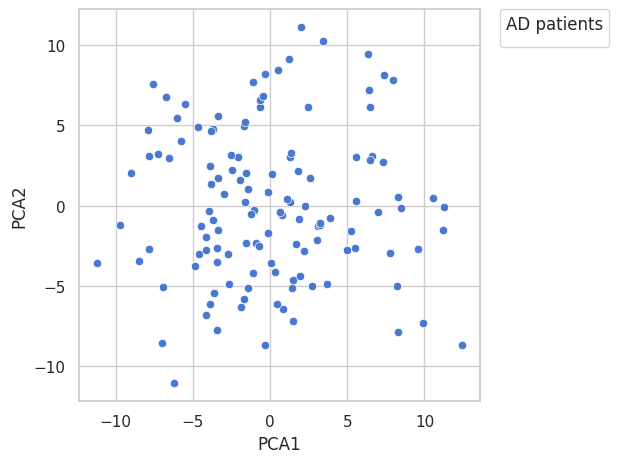

In [13]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_pickle("rosmap_gwas_snps_matrix_filtered_final.pkl")
# df = df[df['tissue'] == 6]
# df['tissue'] = df['tissue'].map({1: '2', 3: '1', 6: '3'})

# Separate the features and the target 'tissue' column
features = df.iloc[:, 1:]  # Features start from column 7 (0-based index)
target = df.index

# Run PCA on the features
pca = PCA(n_components=2)  # Adjusted to 2 components for visualization
X_pca = pca.fit_transform(features)

# Encode the 'tissue' labels
le = LabelEncoder()
y_lan = le.fit_transform(target)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame({
    "PCA1": X_pca[:, 0],
    "PCA2": X_pca[:, 1],
    "Tissue": target,
    "label": y_lan
})

# Plot the PCA results
sns.set(style="whitegrid", palette="muted")
ax = sns.scatterplot(x="PCA1", y="PCA2", data=pca_df, palette="deep")
plt.legend(title="AD patients", bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.savefig('AD_patients_original_pca.png', dpi=900)
plt.show()


In [ ]:
# To see the eigenvalues (explained variance) for the principal components (PCAs)

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import numpy as np

# Load the dataset
df = pd.read_pickle("rosmap_gwas_snps_matrix_filtered_final.pkl")

# Separate the features (assuming features start from column 7)
features = df.iloc[:, 0:]

# Split the dataset into training and validation sets
X_train, X_valid = train_test_split(features, test_size=0.3, random_state=42)

# Initialize PCA with the desired number of components and a fixed random state
n_components = 7  # Adjust this to your desired number of components
pca = PCA(n_components=n_components, random_state=100)

# Fit PCA on the training data and transform both training and validation data
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid)

# Get the explained variance (eigenvalues) for each principal component
pca_explained_variance = pca.explained_variance_

# Calculate the cumulative sum of eigenvalues (explained variance)
cumulative_sum_eigenvalues = np.cumsum(pca.explained_variance_ratio_)

# Print or use the eigenvalues and cumulative sum of eigenvalues
print("Eigenvalues for each principal component:", pca_explained_variance)
print("Cumulative sum of eigenvalues:", cumulative_sum_eigenvalues)


Eigenvalues for each principal component: [27.73488397 25.64027279 22.3892521  21.44691654 19.75923171 18.57249445
 16.75763618]
Cumulative sum of eigenvalues: [0.03864146 0.07436461 0.1055583  0.13543909 0.16296852 0.18884453
 0.21219201]


In [ ]:
import matplotlib.pyplot as plt

# Create a bar chart of the eigenvalues (explained variance) for each principal component
plt.figure(figsize=(9, 6))
plt.bar(range(1, n_components + 1), pca_explained_variance, alpha=0.7, label='Individual Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue (Explained Variance)')
plt.title('Explained Variance by Principal Components')
plt.xticks(range(1, n_components + 1))
plt.legend()
plt.savefig('pca_original_eigenvalues.png', dpi=450)
plt.show()

## Kmeans clustering

### 1. Perform K-means clustering and plot PCA

In [22]:
import pandas as pd
df = pd.read_pickle("rosmap_gwas_snps_matrix_filtered_final.pkl")
df

SNP_ID,rs72777665,rs35345466,rs11257183,rs16914105,rs7917618,rs2271564,rs7099368,rs920964,rs2458663,rs1177701,...,rs34674752,rs12550729,rs12549149,rs11136254,rs34173062,rs36137267,rs6606291,rs12337435,rs12343184,rs28886421
R8882846,2.00000,1.87074,2.0,2.0,1.99940,2.0,2.0,1.99299,1.0,0.99995,...,1.97098,1.99245,1.99342,1.99191,1.83652,0.19670,1.89330,1.00483,1.00133,2.00000
R9823938,2.00000,0.93168,2.0,2.0,1.99988,1.0,1.0,1.99636,1.0,0.99996,...,1.87909,1.02815,1.04426,1.04467,1.92940,1.99527,1.90010,1.99993,1.99999,1.98052
R9064073,1.32430,0.00001,2.0,2.0,1.99811,1.0,1.0,1.99875,1.0,0.99985,...,1.85465,1.99635,1.99558,1.99554,1.85657,1.00758,1.88619,1.99917,1.99921,1.99292
R8059669,2.00000,0.94354,2.0,2.0,2.00000,2.0,1.0,1.19032,1.0,0.99924,...,1.88461,1.99685,1.99575,1.99595,1.85235,0.10968,1.89351,0.97233,0.97255,1.98956
R5955028,1.28995,0.00000,1.0,2.0,1.99906,1.0,1.0,1.99829,1.0,0.99930,...,1.89261,1.99625,1.99509,1.99512,1.85162,0.09067,1.88484,1.99981,1.99981,2.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R6411801,2.00000,0.39161,2.0,2.0,1.99970,1.0,1.0,1.99850,1.0,0.99953,...,1.96954,1.03483,1.03643,1.03641,1.91152,0.05936,1.89518,1.99998,1.99997,1.98740
R1154454,2.00000,0.91812,1.0,2.0,1.99860,2.0,2.0,1.99618,2.0,1.99832,...,1.89254,1.99626,1.99268,1.99390,1.87930,1.99030,1.88489,1.05079,1.04924,2.00000
R4388056,2.00000,0.00006,2.0,2.0,1.99817,1.0,1.0,1.99748,1.0,0.99984,...,1.85661,1.99514,1.99405,1.99415,1.86772,0.07189,1.88619,1.01965,1.00239,1.99281
R7289081,1.27963,0.91665,2.0,2.0,2.00000,2.0,0.0,2.00000,0.0,0.00029,...,1.92364,1.88556,1.88636,1.88593,1.89398,0.99844,1.88121,0.00869,0.00232,1.98999


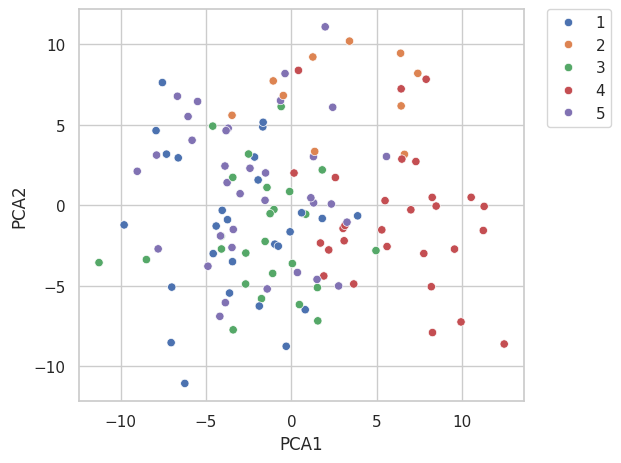

In [23]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset

df = pd.read_pickle("rosmap_gwas_snps_matrix_filtered_final.pkl")
# df = df[df['tissue'] == 3]


# Separate the features (assuming features start from column 7)
features = df.iloc[:, 0:]

# Perform PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(features)

# Perform K-means clustering
kmeans = KMeans(init="random", n_clusters=5, n_init=2000, max_iter=4000, random_state=42)
kmeans_labels = kmeans.fit_predict(features)



# Create a DataFrame for PCA results with K-means labels
pca_df = pd.DataFrame({
    "PCA1": X_pca[:, 0],
    "PCA2": X_pca[:, 1],
    "kmeans_labels": kmeans_labels+1
})

# Plot the PCA results with K-means clustering labels
sns.set(style="whitegrid", palette="muted")
ax = sns.scatterplot(x="PCA1", y="PCA2", hue="kmeans_labels", data=pca_df, palette="deep")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
# plt.savefig('pca_tissue_6_clusters.png', dpi=700)
plt.show()


In [ ]:
kmeans_labels

### 2. Verification of number of clusters

#### Elbow method

In [ ]:
# ELbow method for verification:

In [ ]:
from sklearn.cluster import KMeans

# Define K-means parameters
kmeans_kwargs = {"init": "random", "n_init": 1000, "max_iter": 4000, "random_state": 42}

# List to hold the SSE values for each k
sse = []

# Loop over different values of k
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(features)
    sse.append(kmeans.inertia_)

# Plot the SSE values to find the elbow point
plt.style.use("fivethirtyeight")
plt.plot(range(1, 15), sse)
plt.xticks(range(1, 15))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()


In [26]:
from kneed import KneeLocator

# Define K-means parameters
kmeans_kwargs = {"init": "random", "n_init": 1000, "max_iter": 4000, "random_state": 42}

# List to hold the SSE values for each k
sse = []

# Loop over different values of k
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(features)
    sse.append(kmeans.inertia_)

# Find the elbow point using KneeLocator
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
elbow_point = kl.elbow

# Print the elbow point
print(f'Elbow point (optimal number of clusters): {elbow_point}')

Elbow point (optimal number of clusters): 3


#### silhouette coefficient

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load the dataset
#df = pd.read_csv('ROSMAP_shap_samples_v10.csv', index_col=0)

# Separate the features (assuming features start from column 19)
features = df.iloc[:, 0:]

# Define K-means parameters
kmeans_kwargs = {"init": "random", "n_init": 1000, "max_iter": 3000, "random_state": 42}

# A list containing all the average silhouette coefficients for each K
silhouette_coefficients = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(features)
    score = silhouette_score(features, kmeans.labels_)
    silhouette_coefficients.append(score)

# Plot the silhouette coefficients
plt.style.use("fivethirtyeight")
plt.plot(range(2, 15), silhouette_coefficients)
plt.xticks(range(2, 15))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()


### 3. Clustering each tissue and save a new csv file

In [ ]:
import pandas as pd
df = pd.read_csv('ROSMAP_shap_samples_v14_4k_july_22.csv', index_col=0)
df

In [ ]:
# Step 1, clustering and saving the labels

import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Specify the tissue number here for each run
TISSUE_NUMBER = 3  # Change this to 3 and 6 for subsequent runs

# Load the dataset
df = pd.read_csv('ROSMAP_shap_samples_v14_4k_july_22.csv', index_col=0)
df = df[df['tissue'] == TISSUE_NUMBER]

# Separate the features
features = df.iloc[:, 18:]

# Perform K-means clustering
kmeans = KMeans(init="random", n_clusters=5, n_init=3000, max_iter=5000, random_state=42)
kmeans_labels = kmeans.fit_predict(features)

# Save the cluster labels to a file
label_df = pd.DataFrame({'specimen_id': df.index, 'cluster_label': kmeans_labels+1})
label_df['cluster_label'] = str(TISSUE_NUMBER) + '_' + label_df['cluster_label'].astype(str)
label_filename = f'cluster_labels_for_tissue_{TISSUE_NUMBER}.csv'
label_df.to_csv(label_filename, index=False)

In [ ]:
# Step2, Assign_Labels_Script.py

import pandas as pd

# Specify the tissue number and corresponding cluster label file
TISSUE_NUMBER = 3  # Change this for each run (1, 3, 6)
CLUSTER_LABELS_FILE = f'cluster_labels_for_tissue_{TISSUE_NUMBER}.csv'

# Load the dataset and the cluster labels
df = pd.read_csv('ROSMAP_shap_samples_v14_4k_with_clusters.csv', index_col=0)
cluster_labels = pd.read_csv(CLUSTER_LABELS_FILE, index_col='specimen_id')

# Check if 'clusters' column exists, if not, create it and insert at the fourth position
if 'clusters' not in df.columns:
    # Create the column with default values
    df.insert(3, 'clusters', pd.NA)  # Use None or np.nan if preferred
    
# Assign the new cluster labels to the 'clusters' column based on the index
df.loc[cluster_labels.index, 'clusters'] = cluster_labels['cluster_label']

# Save the updated dataframe
df.to_csv('ROSMAP_shap_samples_v14_4k_with_clusters.csv')


In [ ]:
import pandas as pd
df = pd.read_csv('ROSMAP_shap_samples_v14_4k_with_clusters.csv', index_col=0)
# df = df[df['tissue'] == 6]
df

In [ ]:
import pandas as pd

# Assuming df is your DataFrame and it's already loaded
# Calculate the number of rows for each unique cluster
cluster_counts = df['clusters'].value_counts()
print("Number of rows per cluster:")
print(cluster_counts)

# Calculate the number of unique individuals per cluster
unique_individuals_per_cluster = df.groupby('clusters')['individualID'].nunique()
print("Number of unique individuals per cluster:")
print(unique_individuals_per_cluster)

# Calculate the total number of unique individuals across all clusters
total_unique_individuals = df['individualID'].nunique()
print("Total number of unique individuals:")
print(total_unique_individuals)
